# Visualizations Part
## Imports

In [48]:
from datetime import date
import pandas as pd
from rdkit.Chem.PandasTools import LoadSDF
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) Load Data

In [49]:
file_path = "./Data/Cleaned_Dummy_Data.csv"

Bioactives = pd.read_csv(file_path)

## make categories non numerical
#Bioactives.Category = Bioactives.Category.astype("str")
Bioactives.shape

(2363, 171)

In [50]:
Bioactives.head()

,Metadata_EOS,Metadata_Concentration,Metadata_Plate,Category,feature0,feature1,feature2,feature3,feature4,feature5,...,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166
0,EOS100001,10.0,B1001,21,-0.340113,-6.160381,5.041220,0.193125,5.664959,10.365021,...,7.056004,7.200569,7.208704,6.528110,4.949769,-1.551593,-6.876112,-5.357313,-1.237188,2.862012
1,EOS100002,10.0,B1001,3,0.318084,-2.094962,-0.294647,-1.397326,1.659283,1.142868,...,-0.152270,0.151592,0.032867,0.441463,0.427858,1.434103,0.504684,-0.287677,1.503462,0.059650
2,EOS100003,10.0,B1001,17,0.494341,3.917216,13.266124,-0.780008,-0.418166,-0.395327,...,4.037598,3.025693,4.319620,8.073606,3.486751,-7.027011,-3.648018,-1.935674,1.343256,-2.503014
3,EOS100004,10.0,B1001,2,1.194720,0.389072,1.180834,-0.798421,-0.239483,-0.223973,...,0.651479,-0.484511,0.435140,-0.511430,-1.213946,3.958408,-0.656151,1.001920,2.006217,-1.302373
4,EOS100005,10.0,B1001,2,0.964102,-1.365030,-0.901661,0.725072,0.689783,1.552019,...,-0.478705,-0.092207,0.258025,-0.585153,-1.484183,3.857526,0.719787,1.049718,1.821790,-1.240878


# 2) Histograms of single features

## 2.1) Classic histogram with binning

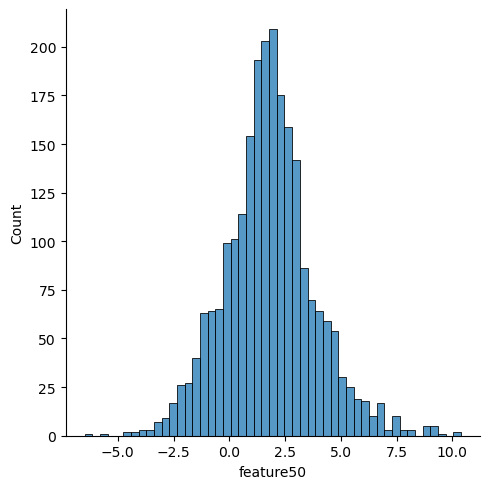

In [8]:
p1 = sns.displot(
    Bioactives, 
    x = "feature50"
)
plt.show()
p1.figure.savefig("./Figures/" + str(date.today()) + "_Histogram.png", transparent=False, bbox_inches='tight', dpi = 600)
plt.close()

## 2.2) Density distribution

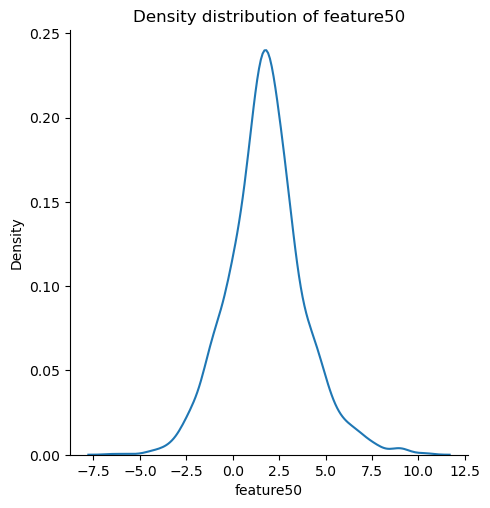

In [9]:
p2 = sns.displot(
    Bioactives, 
    x = "feature50",
    kind="kde"
)
p2.set(title = 'Density distribution of feature50') ### adding plot titles
plt.show()
p2.figure.savefig("./Figures/" + str(date.today()) + "_Density.png", transparent=False, bbox_inches='tight', dpi = 600)
plt.close()

### 2.21) use category to color different conditions

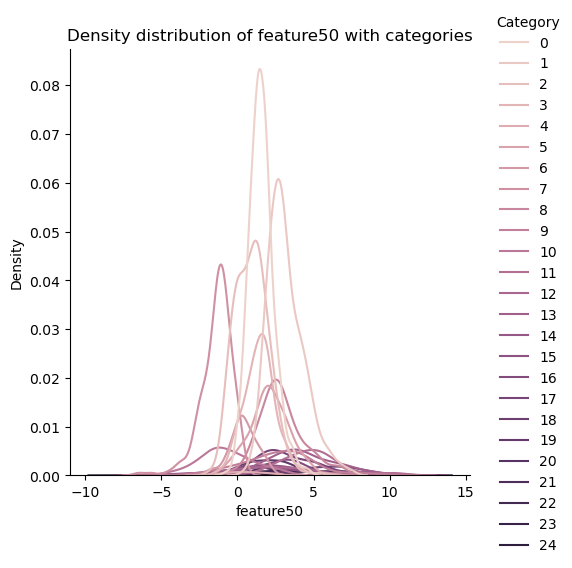

In [10]:
p2 = sns.displot(
    Bioactives, 
    x = "feature50",
    hue = "Category",
    kind="kde"
)
p2.set(title = 'Density distribution of feature50 with categories') ### adding plot titles

plt.show()
p2.figure.savefig("./Figures/" + str(date.today()) + "_Density with categories.png", transparent=False, bbox_inches='tight', dpi = 600)
plt.close()

## 2.3) maybe introduce subplots?

# 3) Boxplots

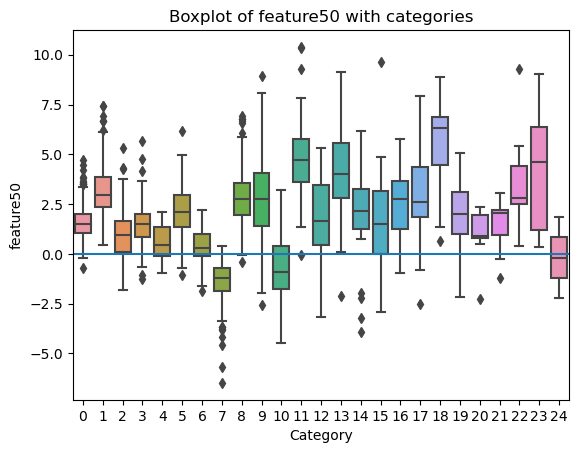

In [12]:
p3 = sns.boxplot(
    data = Bioactives, 
    x = "Category",
    y = "feature50"
)
p3.set(title = 'Boxplot of feature50 with categories') ### adding plot titles
p3.axhline(0) ### makes a nice horizontal line at 0

plt.show()
p3.figure.savefig("./Figures/" + str(date.today()) + "_boxplot.png", transparent=False, bbox_inches='tight', dpi = 600)
plt.close()

# 4) Dimensionality reduction

## 4.1) 2D PCA
principal component analysis, the classic way to reduce dimensionality and visualize multi-parametric datasets in 2D or 3D

### 4.11) Data Normalization
since PCA depends on the variability of each feature, we have to make sure that the variance in all features is equal

In [51]:
### we only work with the features not with the metadata
x = Bioactives.loc[:, Bioactives.columns.str.startswith("feature")]
normalized_data = StandardScaler().fit_transform(x) # normalizing the features. Actually the data already is normalized by pyCytoMiner!!!!!



### 4.12) Transform Data

In [58]:
### initialize PCA model
pca = PCA(n_components=2, random_state=0)

### transform data
proj_PCA = pca.fit_transform(normalized_data)

### Create a DataFrame with the principal component values and merge it with the metadata of our original data
proj_PCA_df = pd.DataFrame(data = proj_PCA,
                       columns = ['Axis 1', 'Axis 2'])

meta_cols = ["Metadata_EOS", "Metadata_Concentration", "Metadata_Plate", "Category"]
PCA_Data = pd.merge(Bioactives.loc[:, meta_cols], proj_PCA_df, left_index = True, right_index = True)

### 4.13) Info
in PCA we can calculate how much of our original data is explained by each principle component

In [59]:
print("Explained Variance")
for i in range(0,2):
    print("Axis", i+1, ":", round(pca.explained_variance_ratio_[i], 4)*100, "%")

Explained Variance
Axis 1 : 24.37 %
Axis 2 : 14.11 %


### 4.14) Scatterplot

In [60]:
### sometimes it is nicer to plot the categories if they are not numerical
PCA_Data = PCA_Data.sort_values("Category")
PCA_Data.Category = PCA_Data.Category.astype("str")

In [62]:
p1 = sns.relplot(
    data = PCA_Data,
    x="Axis 1", 
    y="Axis 2",
    hue = "Category",  
    s = 10
)

p1.set(xlabel = "PCA Axis 1, Explained Variance: " + str(round(pca.explained_variance_ratio_[0], 4)*100) + "%", 
       ylabel = "UMAP Axis 2, Explained Variance: " + str(round(pca.explained_variance_ratio_[1], 4)*100) + "%", 
       title = "PCA projection")
p1.figure.savefig("./Figures/" + str(date.today()) + "_PCA_2D.png", transparent=False, bbox_inches='tight', dpi = 600)